# Toilet Paper Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Toilet Paper Stock
symbols = ['CLW','ITP','KMB','PG']
start = '2019-12-01'
end = '2020-04-02'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

121

In [7]:
df.head()

,CLW,ITP,KMB,PG
Date,,,,
2019-12-02,21.540001,0.95,134.302536,121.995300
2019-12-03,21.850000,1.00,134.036499,122.223938
2019-12-04,22.709999,1.02,135.475098,123.794609
2019-12-05,22.530001,0.99,135.534668,123.884079
2019-12-06,22.950001,0.98,135.991333,123.456619


In [8]:
df.tail()

,CLW,ITP,KMB,PG
Date,,,,
2020-03-26,21.020000,0.59,124.010002,107.379997
2020-03-27,21.400000,0.60,124.889999,110.169998
2020-03-30,20.959999,0.59,132.429993,115.000000
2020-03-31,21.809999,0.62,127.870003,110.000000
2020-04-01,17.750000,0.64,125.660004,109.330002


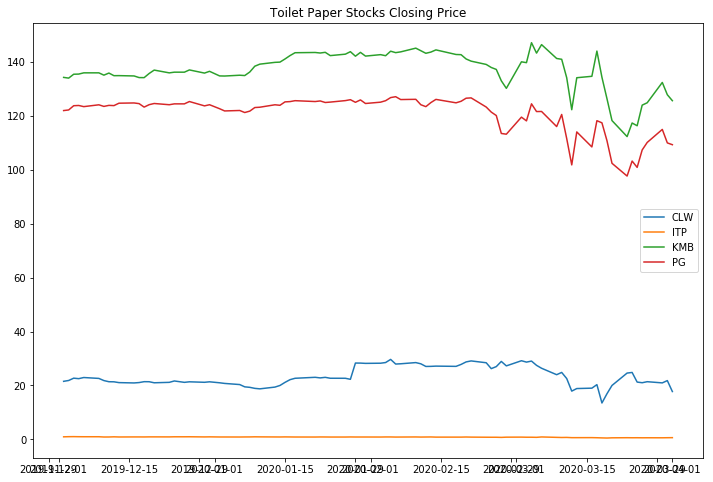

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Toilet Paper Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

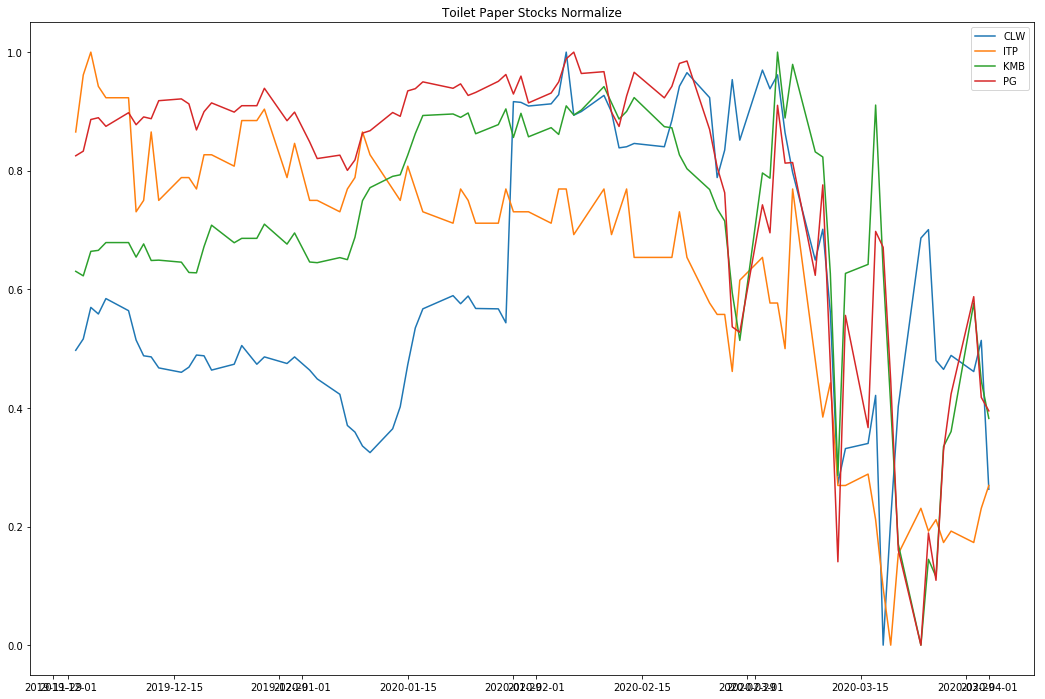

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Toilet Paper Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

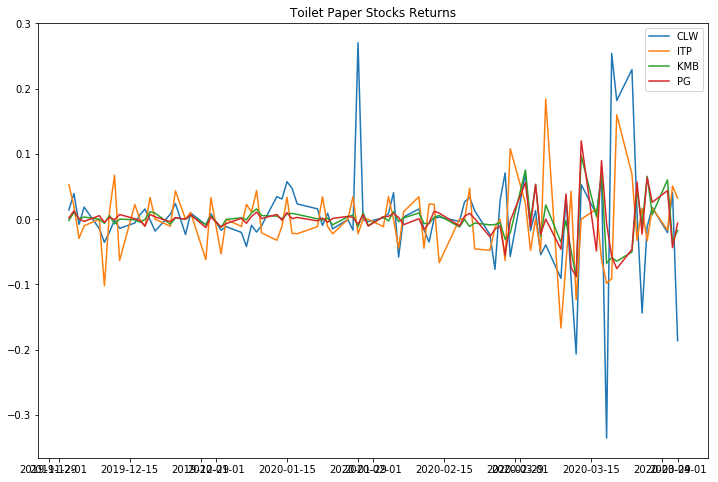

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Toilet Paper Stocks Returns')
plt.legend(labels=stock_rets.columns)

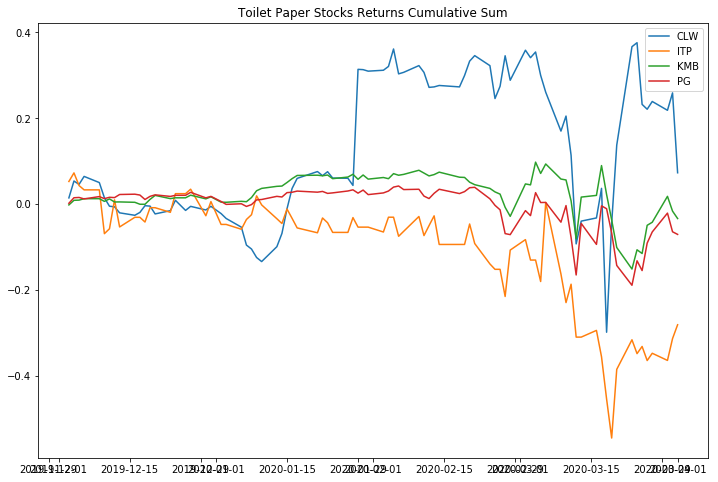

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Toilet Paper Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

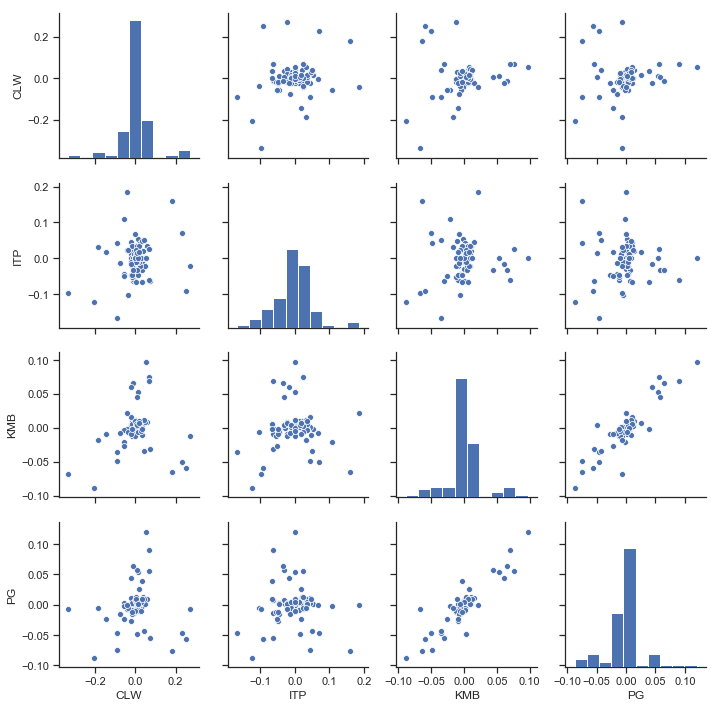

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

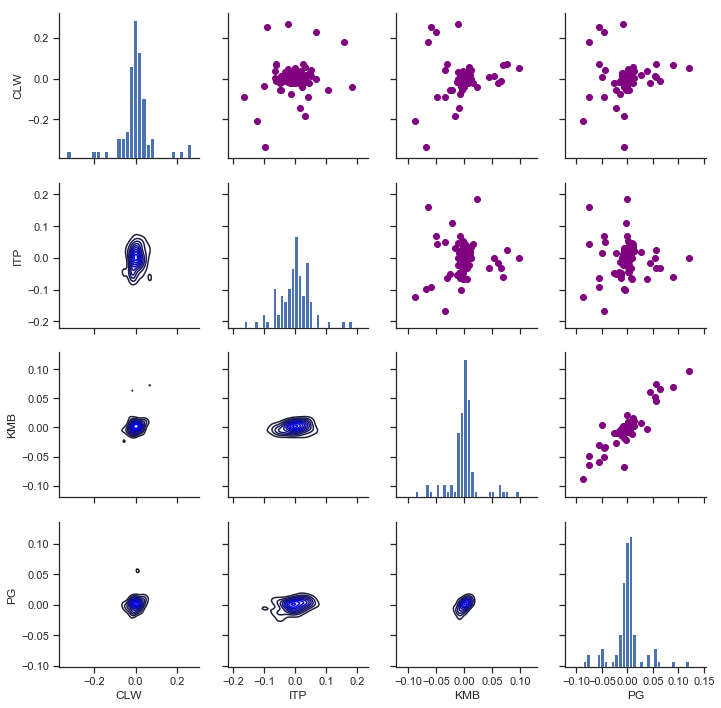

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

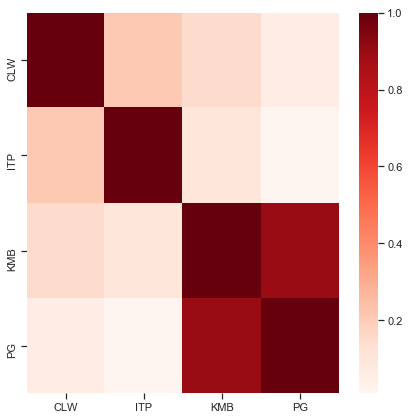

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

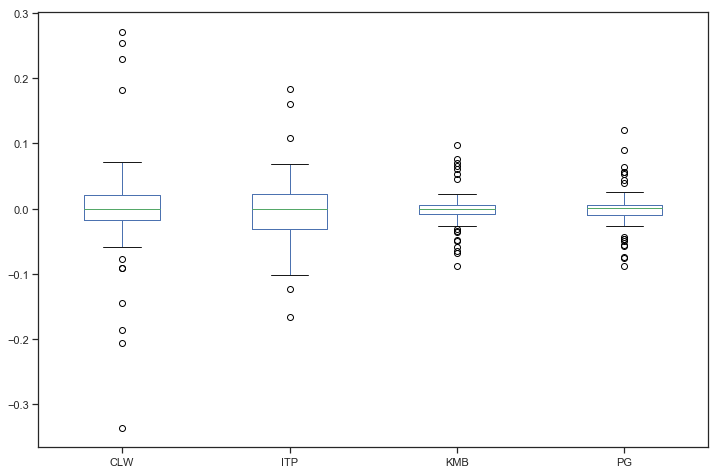

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

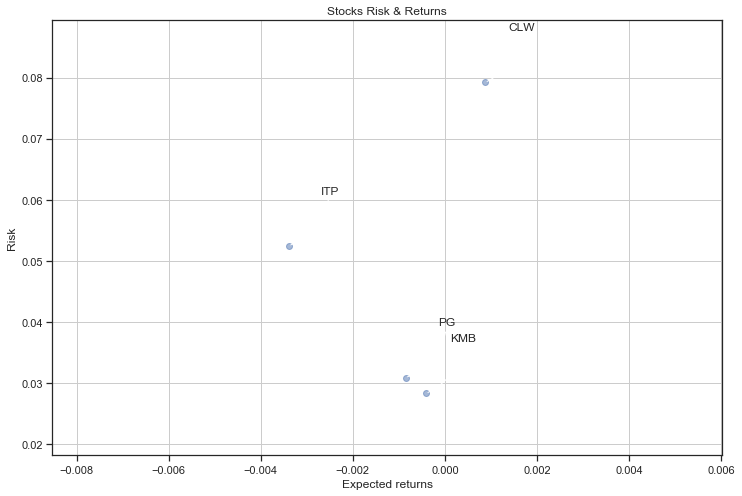

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

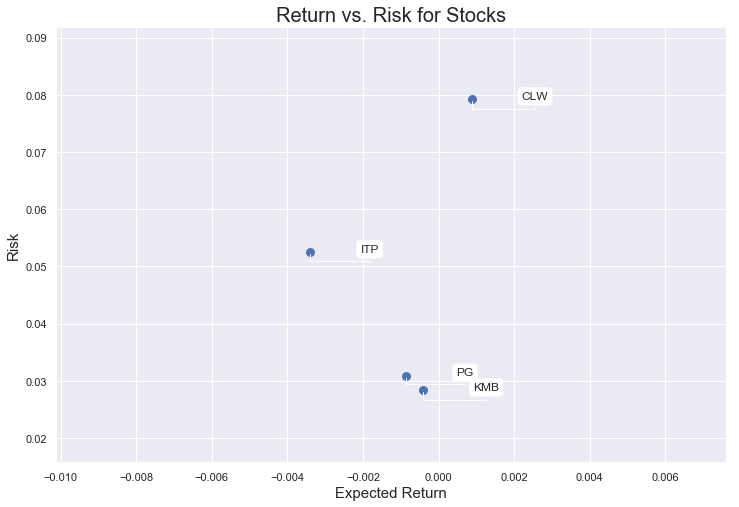

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

PG   PG     1.000000
KMB  KMB    1.000000
ITP  ITP    1.000000
CLW  CLW    1.000000
PG   KMB    0.897206
KMB  PG     0.897206
ITP  CLW    0.210960
CLW  ITP    0.210960
KMB  CLW    0.148511
CLW  KMB    0.148511
KMB  ITP    0.102046
ITP  KMB    0.102046
PG   CLW    0.062035
CLW  PG     0.062035
PG   ITP    0.009605
ITP  PG     0.009605
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,CLW,ITP,KMB,PG
Date,,,,
2019-12-03,0.577218,0.625000,0.465792,0.430184
2019-12-04,0.618430,0.532000,0.534375,0.483092
2019-12-05,0.540380,0.391177,0.478849,0.424634
2019-12-06,0.584233,0.446212,0.494653,0.404518
2019-12-09,0.529728,0.475000,0.476477,0.447543


In [23]:
Normalized_Value.corr()

,CLW,ITP,KMB,PG
CLW,1.000000,0.210960,0.148511,0.062035
ITP,0.210960,1.000000,0.102046,0.009605
KMB,0.148511,0.102046,1.000000,0.897206
PG,0.062035,0.009605,0.897206,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

PG   PG     1.000000
KMB  KMB    1.000000
ITP  ITP    1.000000
CLW  CLW    1.000000
PG   KMB    0.897206
KMB  PG     0.897206
ITP  CLW    0.210960
CLW  ITP    0.210960
KMB  CLW    0.148511
CLW  KMB    0.148511
KMB  ITP    0.102046
ITP  KMB    0.102046
PG   CLW    0.062035
CLW  PG     0.062035
PG   ITP    0.009605
ITP  PG     0.009605
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
CLW    0.000879
ITP   -0.003388
KMB   -0.000406
PG    -0.000851
dtype: float64
--------------------------------------------------
Stock risks:
CLW    0.079225
ITP    0.052487
KMB    0.028328
PG     0.030906
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
ITP,-0.003388,0.052487
PG,-0.000851,0.030906
KMB,-0.000406,0.028328
CLW,0.000879,0.079225


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
KMB,-0.000406,0.028328
PG,-0.000851,0.030906
ITP,-0.003388,0.052487
CLW,0.000879,0.079225


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
CLW,0.000879,0.079225,-0.115132
ITP,-0.003388,0.052487,-0.255074
KMB,-0.000406,0.028328,-0.367345
PG,-0.000851,0.030906,-0.351104


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
CLW,0.000879,0.079225,-0.115132,0.270525,-0.335303,-0.000441,-18.615312
ITP,-0.003388,0.052487,-0.255074,0.184211,-0.166667,0.000000,3.225803
KMB,-0.000406,0.028328,-0.367345,0.097048,-0.088327,0.000000,-1.728317
PG,-0.000851,0.030906,-0.351104,0.120090,-0.087373,0.000723,-0.609089


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
CLW,0.000879,0.079225,-0.115132,0.270525,-0.335303,-0.000441,-18.615312,-0.001701
ITP,-0.003388,0.052487,-0.255074,0.184211,-0.166667,0.000000,3.225803,0.000262
KMB,-0.000406,0.028328,-0.367345,0.097048,-0.088327,0.000000,-1.728317,-0.000144
PG,-0.000851,0.030906,-0.351104,0.120090,-0.087373,0.000723,-0.609089,-0.000050


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
CLW,0.000879,0.079225,-0.115132,0.270525,-0.335303,-0.000441,-18.615312,-0.001701,-0.331719
ITP,-0.003388,0.052487,-0.255074,0.184211,-0.166667,0.000000,3.225803,0.000262,-0.560726
KMB,-0.000406,0.028328,-0.367345,0.097048,-0.088327,0.000000,-1.728317,-0.000144,-0.129361
PG,-0.000851,0.030906,-0.351104,0.120090,-0.087373,0.000723,-0.609089,-0.000050,-0.204100


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
CLW,0.000879,0.079225,-0.115132,0.270525,-0.335303,-0.000441,-18.615312,-0.001701,-0.331719
KMB,-0.000406,0.028328,-0.367345,0.097048,-0.088327,0.000000,-1.728317,-0.000144,-0.129361
PG,-0.000851,0.030906,-0.351104,0.120090,-0.087373,0.000723,-0.609089,-0.000050,-0.204100
ITP,-0.003388,0.052487,-0.255074,0.184211,-0.166667,0.000000,3.225803,0.000262,-0.560726
